# E-tivity 3: Clustering and Manifold Learning

## Name: Martin Power
## ID      : 9939245

Use this notebook to complete Tasks 1 and 2 in E-tivity3.

### Import Python Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import manifold
from sklearn import cluster
from sklearn import preprocessing
from sklearn.preprocessing import power_transform
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from matplotlib.ticker import FixedLocator
from matplotlib.ticker import FixedFormatter

# Table of Contents

#### Task 1
* [Task 1 Code](#task1)
* [Task 1 - Feature Scaling](#task1_scale)
* [Task 1 - MDS Visualisation](#task1_mds)
* [Task 1 - t-SNE Visualisation](#task1_tsne)
* [Task 1 - Cluster Description](#task1_desc)
* [Task 1 - Cluster Characteristics](#task1_cha)

#### Task 2
* [Task 2 Code](#task2)
* [Task 2 -  Sum of Squared Distances Plot](#task2_plot)
* [Task 2 -  Elbow Method to Find Best k](#task2_elbow)
* [Task 2 -  Silhouette Coefficient Method to Find Best k](#task2_sc)
* [Task 2 -  Additional Clustering Algorithm](#task2_add_algo)
* [Task 2 -  Additional Manifold Learning Technique](#task2_add_man)
* [Task 2 -  Visual Comparison of Clusterings](#task2_vcomp)
* [Task 2 -  Difference Between K-Means And Second Algorithm Discussion](#task2_diff)

<a id='task1'></a>

# Task 1 (CS5062)

Inspect and Analyse Dataset to begin with

In [2]:
df = pd.read_csv("./loans_dataset_et3.csv")

print("Number of Samples  in Dataset:\t",df.shape[0])
print("Number of Features in Dataset:\t",df.shape[1])

Number of Samples  in Dataset:	 332
Number of Features in Dataset:	 5


In [3]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,2483,2466.0,90,180,0
1,4917,0.0,130,360,0
2,4106,0.0,40,180,1
3,3859,3300.0,142,180,1
4,6417,0.0,157,180,1


<a id='task1_scale'></a>

In [4]:
df.tail()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
327,5417,4196.0,267,360,1
328,16666,0.0,275,360,1
329,10750,0.0,312,360,1
330,5955,5625.0,315,360,1
331,6133,3906.0,324,360,1


In [5]:
# Print statistical summary for all attributes
df.describe(include='all')

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,332.000000,332.000000,332.000000,332.000000,332.000000
mean,5201.093373,1495.508795,140.882530,341.710843,0.978916
std,4584.815491,1982.742932,75.544237,61.651497,0.143882
min,645.000000,0.000000,17.000000,60.000000,0.000000
25%,2912.750000,0.000000,100.000000,360.000000,1.000000
50%,3858.500000,1211.500000,128.000000,360.000000,1.000000
75%,5818.250000,2250.000000,162.000000,360.000000,1.000000
max,39999.000000,20000.000000,600.000000,480.000000,1.000000


In [6]:
# Quick Check to Ensure no missing data
print(df.isnull().any())

ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
dtype: bool


In [7]:
def plot_hist_with_box(feature):
    # From https://python-graph-gallery.com/24-histogram-with-a-boxplot-on-top-seaborn/
    # Cut the window in 2 parts
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

    # Add a graph in each part
    sns.boxplot(feature, ax=ax_box)
    sns.distplot(feature, ax=ax_hist)

    # Remove x axis name for the boxplot
    ax_box.set(xlabel='')
    plt.show()
    return

C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


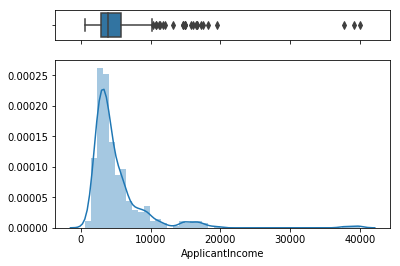

In [8]:
plot_hist_with_box(df['ApplicantIncome'])

#plot_hist_with_box(power_transform(np.expand_dims(df['ApplicantIncome'], axis=1), method='box-cox'))
#df['bc_age'] = power_transform(np.expand_dims(df['age'], axis=1), method='box-cox')

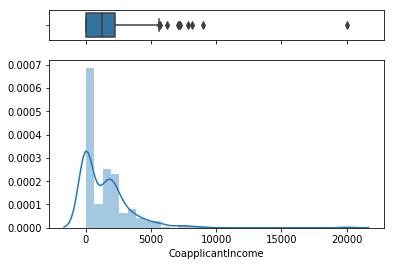

In [9]:
plot_hist_with_box(df['CoapplicantIncome'])
#plot_hist_with_box(power_transform(np.expand_dims(df['CoapplicantIncome'], axis=1), method='yeo-johnson'))
#plot_hist_with_box(power_transform(np.expand_dims(df['CoapplicantIncome']+1, axis=1), method='box-cox'))

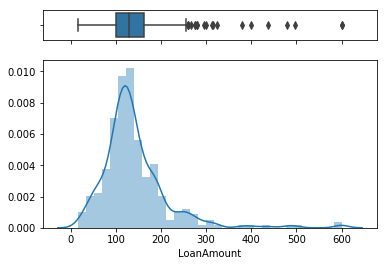

In [10]:
plot_hist_with_box(df['LoanAmount'])
#plot_hist_with_box(power_transform(np.expand_dims(df['LoanAmount'], axis=1), method='yeo-johnson'))
#plot_hist_with_box(power_transform(np.expand_dims(df['LoanAmount']+1, axis=1), method='box-cox'))

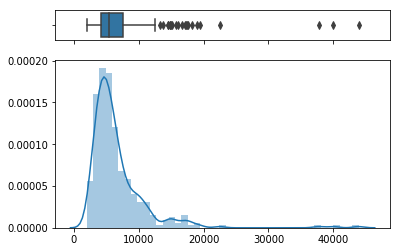

In [11]:
plot_hist_with_box(df['ApplicantIncome']+df['CoapplicantIncome'])
#plot_hist_with_box(power_transform(np.expand_dims(df['ApplicantIncome']+df['CoapplicantIncome'], axis=1), method='box-cox'))

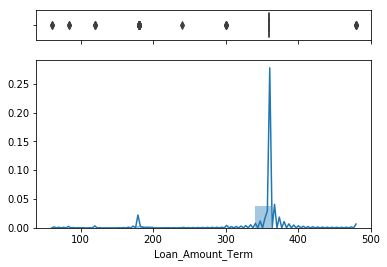

In [12]:
plot_hist_with_box(df['Loan_Amount_Term'])

#plot_hist_with_box(power_transform(np.expand_dims(df['Loan_Amount_Term'], axis=1), method='box-cox'))

#min_max_scaler = preprocessing.MinMaxScaler()
#lab3_data = min_max_scaler.fit_transform(lab3_data)
#plot_hist_with_box(min_max_scaler.fit_transform(np.expand_dims(df['Loan_Amount_Term'], axis=1)))

#min_max_scaler = preprocessing.MinMaxScaler()
#lab3_data = min_max_scaler.fit_transform(lab3_data)
#plot_hist_with_box(min_max_scaler.fit_transform(np.expand_dims(df['Loan_Amount_Term']/12, axis=1)))

#robust_scaler = preprocessing.RobustScaler()
#lab3_data = min_max_scaler.fit_transform(lab3_data)
#plot_hist_with_box(robust_scaler.fit_transform(np.expand_dims(df['Loan_Amount_Term']/12, axis=1)))

In [13]:
print(df['Loan_Amount_Term'].nunique())
df['Loan_Amount_Term'].value_counts()

8


360    292
180     24
480      4
300      4
120      3
84       2
60       2
240      1
Name: Loan_Amount_Term, dtype: int64

In [14]:
print(df['Credit_History'].nunique())
df['Credit_History'].value_counts()

2


1    325
0      7
Name: Credit_History, dtype: int64

In [15]:
print(df['LoanAmount'].nunique())
#df['LoanAmount'].value_counts() # Too many to print without cluttering notebook

148


## Task 1 - Feature Scaling

In [16]:
# Reusing code from Lab3

# Fixed typo in code where 'blue' appeared twice. Replaced with 'yellow'
colors = np.array(['orange', 'blue', 'lime', 'yellow', 'khaki', 'pink', 'green', 'purple'])

bookcolors_key = np.array(['crimson', 'red', 'redorange', 'orange', 'yellow', 'sky', 'babyblue', 'lightblue', 'blue', 'purple'])

bookcolors = {
         'crimson': '#a50026', 'red': '#d73027',
         'redorange': '#f46d43', 'orange': '#fdae61',
         'yellow': '#fee090', 'sky': '#e0f3f8',
         'babyblue': '#abd9e9', 'lightblue': '#74add1',
         'blue': '#4575b4', 'purple': '#313695'
     }

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot

def clustering_scatterplot(points, labels, centers, title):
    # plot the examples, i.e. the data points
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        #c=bookcolors[bookcolors_key[i%bookcolors_key.size]],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

In [17]:
scale_data = np.array(df.values, dtype=float)
print('(number of examples, number of attributes): ', scale_data.shape)

(number of examples, number of attributes):  (332, 5)


#### Apply Min-Max Scaling

In [18]:
min_max_scaler = preprocessing.MinMaxScaler()
scale_data = min_max_scaler.fit_transform(scale_data)

#### Run K-Means on Scaled Data

In [19]:
# K-Means Parameters
k = 4

# Number of time the k-means algorithm will be run with different centroid seeds.
# The final results will be the best output of n_init consecutive runs in terms of inertia.
n_init = 20

# Maximum number of iterations of the k-means algorithm for a single run.
max_iter = 500
random_state = 0 # Use this to make results repeable for analysis in Markdown cells


In [20]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=n_init, max_iter=max_iter, random_state=random_state).fit(scale_data)

In [21]:
# append the cluster centers to the dataset
scale_data_and_centers = np.r_[scale_data,clustered_data_sklearn.cluster_centers_]

<a id='task1_mds'></a>

<a id='task1_tsne'></a>

## Task 1 - MDS Visualisation

## Task 1 - t-SNE Visualisation

In [22]:
def plot_mds_tsne(n_clusters, plot_data, plot_labels, n_components=2, random_state=0):
    # Plot MDS and t-SNE visualisations for data
    
    plt.subplots(1, 2, figsize=(15, 5))
    
    # MDS Plot
    plt.subplot(1,2,1)
    # project both th data and the k-Means cluster centers to a 2D space
    XYcoordinates = manifold.MDS(n_components=n_components, random_state=random_state).fit_transform(plot_data)
    clustering_scatterplot(points=XYcoordinates[:-n_clusters,:], 
                       labels=plot_labels, 
                       centers=XYcoordinates[-n_clusters:,:], 
                       title='MDS')
    
    # t-SNE Plot
    plt.subplot(1,2,2)
    XYcoordinates = manifold.TSNE(n_components=n_components, random_state=random_state).fit_transform(plot_data)
    clustering_scatterplot(points=XYcoordinates[:-n_clusters,:], 
                       labels=plot_labels,
                       centers=XYcoordinates[-n_clusters:,:], 
                       title='t-SNE')
    # Plot graphs
    plt.show()
    

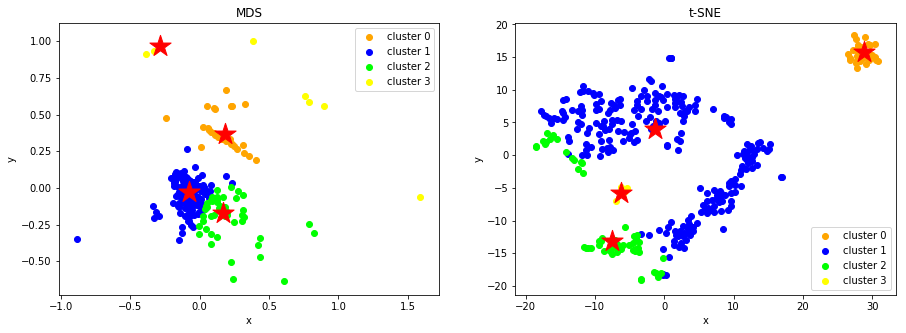

In [23]:
plot_mds_tsne(k, scale_data_and_centers, clustered_data_sklearn.labels_, n_components=2)

In [24]:
def plot_se_lle(n_clusters, n_neighbors,plot_data, plot_labels, n_components=2, random_state=0):
    # Plot Spectral Embedding and  Locally Linear Embedding visualisations for data
    
    plt.subplots(1, 2, figsize=(15, 5))
    
    # SE Plot
    plt.subplot(1,2,1)
    XYcoordinates = manifold.SpectralEmbedding(n_components=n_components,n_neighbors=n_neighbors,random_state=random_state).fit_transform(plot_data)
    clustering_scatterplot(points=XYcoordinates[:-n_clusters,:], 
                       labels=plot_labels, 
                       centers=XYcoordinates[-n_clusters:,:], 
                       title='Spectral Embedding')
    
    # LLE Plot
    plt.subplot(1,2,2)
    XYcoordinates = manifold.LocallyLinearEmbedding(n_components=n_components,n_neighbors=n_neighbors,random_state=random_state).fit_transform(plot_data)
    clustering_scatterplot(points=XYcoordinates[:-n_clusters,:], 
                       labels=plot_labels,
                       centers=XYcoordinates[-n_clusters:,:], 
                       title='Locally Linear Embedding')
    # Plot graphs
    plt.show()
    

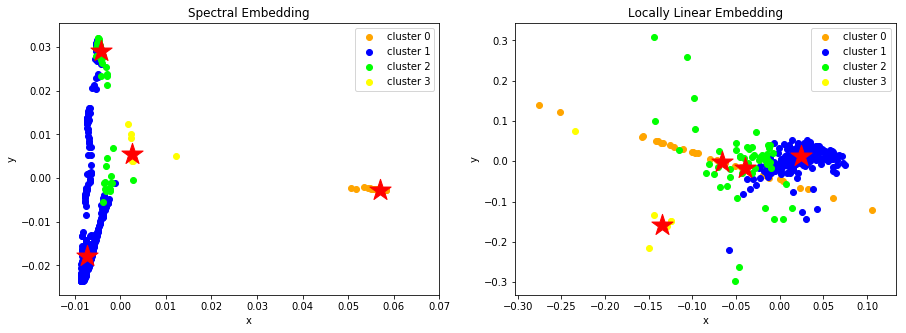

In [25]:
plot_se_lle(k, 10, scale_data_and_centers, clustered_data_sklearn.labels_, n_components=2)

<a id='task1_desc'></a>

## Task 1 - Cluster Description

In [26]:
# Append the cluster labels to the original data
df['cluster_k4'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)

In [27]:
print(df['cluster_k4'].nunique())
df['cluster_k4'].value_counts()

4


1    241
2     54
0     30
3      7
Name: cluster_k4, dtype: int64

In [28]:
df.groupby('cluster_k4').mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
cluster_k4,,,,,
0,5146.966667,1297.126666,116.333333,161.600000,1.0
1,3829.493776,1541.436183,118.419087,361.493776,1.0
2,10840.166667,1322.629630,246.296296,357.777778,1.0
3,9153.857143,2098.142857,206.285714,308.571429,0.0


<a id='task1_char'></a>

## Task 1 - Cluster Characteristics

<a id='task2'></a>

# Task 2 (CS5062)

<a id='task2_plot'></a>

## Task 2 - Sum of Squared Distances Plot

In [29]:
min_k = 2
max_k = 8

kvals = np.array(range(min_k,max_k+1))

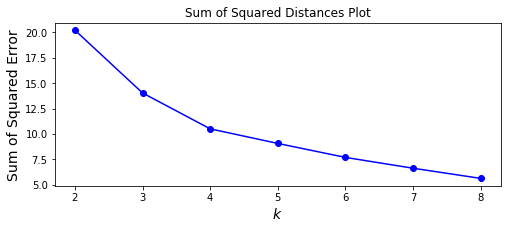

In [30]:
sse = np.empty(len(kvals))

for i in range(len(kvals)):
    clustered_data_sklearn = cluster.KMeans(n_clusters=kvals[i],  n_init=n_init, max_iter=max_iter, random_state=random_state).fit(scale_data)
    
    # Store Sum of Squared Error Value
    sse[i] = clustered_data_sklearn.inertia_     


plt.figure(figsize=(8, 3))
plt.title("Sum of Squared Distances Plot") 
plt.plot(kvals,  sse, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Sum of Squared Error", fontsize=14)
plt.show()

<a id='task2_elbow'></a>

## Task 2 - Elbow Method to Find Best k

<a id='task2_sc'></a>

## Task 2 - Silhouette Coefficient Method to Find Best k

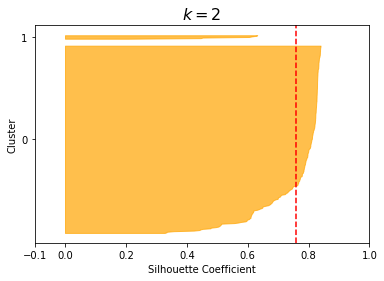

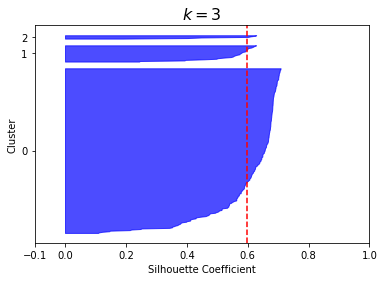

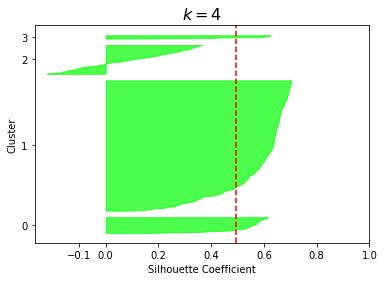

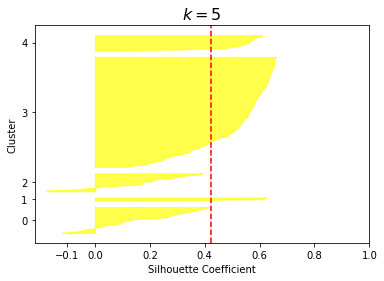

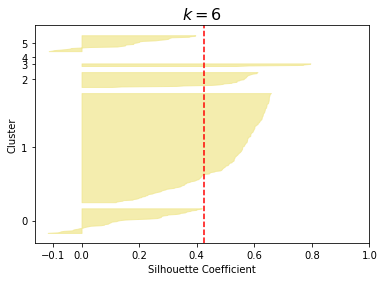

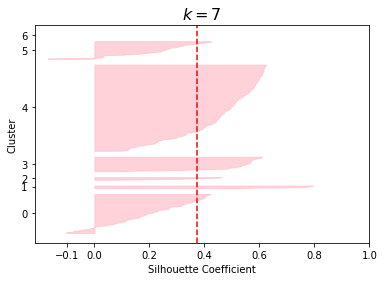

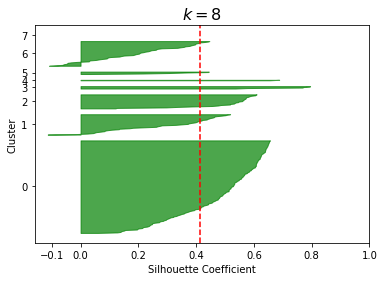

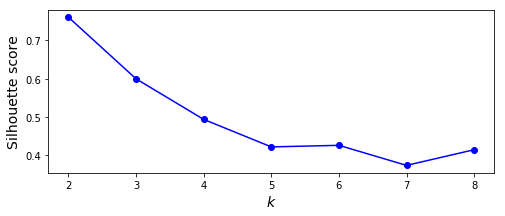

For k = 2 The average silhouette_score is : 0.7596807546208396
For k = 3 The average silhouette_score is : 0.5993683877939564
For k = 4 The average silhouette_score is : 0.49382717460168524
For k = 5 The average silhouette_score is : 0.4222843719671475
For k = 6 The average silhouette_score is : 0.42634925012082986
For k = 7 The average silhouette_score is : 0.3741853059971289
For k = 8 The average silhouette_score is : 0.41493989203937404


In [31]:
# From https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
# From https://github.com/ageron/handson-ml2/blob/master/09_unsupervised_learning.ipynb

# Empty Array to Store Silhouette values
silhouette_avg = np.empty(len(kvals))


for i in range(len(kvals)):

    clustered_data_sklearn = cluster.KMeans(n_clusters=kvals[i],  n_init=n_init, max_iter=max_iter, random_state=random_state).fit(scale_data)
 
    
    cluster_labels = clustered_data_sklearn.labels_
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg[i] = silhouette_score(scale_data, cluster_labels)
    
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(scale_data, cluster_labels)

    padding = len(scale_data) // 30
    pos = padding
    ticks = []
    

    for j in range(kvals[i]):
        coeffs = sample_silhouette_values[cluster_labels==j]
        coeffs.sort()

        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=colors[i%colors.size], edgecolor=colors[i%colors.size], alpha=0.7)
        
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(kvals[i])))
    plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.xlabel("Silhouette Coefficient")
    plt.ylabel("Cluster")
    plt.axvline(x=silhouette_avg[i], color="red", linestyle="--")
    plt.title("$k={}$".format(kvals[i]), fontsize=16)
    plt.show()
    

# Plot Silhoette Scores

plt.figure(figsize=(8, 3))
plt.plot(kvals,  silhouette_avg, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

for i in range(len(kvals)):    
    print("For k =", kvals[i], "The average silhouette_score is :", silhouette_avg[i])  

##### Re-Run with K = 3

In [32]:
# K-Means Parameters
k = 3

In [33]:
km_k_3 = cluster.KMeans(n_clusters=k, n_init=n_init, max_iter=max_iter, random_state=random_state).fit(scale_data)

In [34]:
# append the cluster centers to the dataset
km_k_3_data_and_centers = np.r_[scale_data,km_k_3.cluster_centers_]

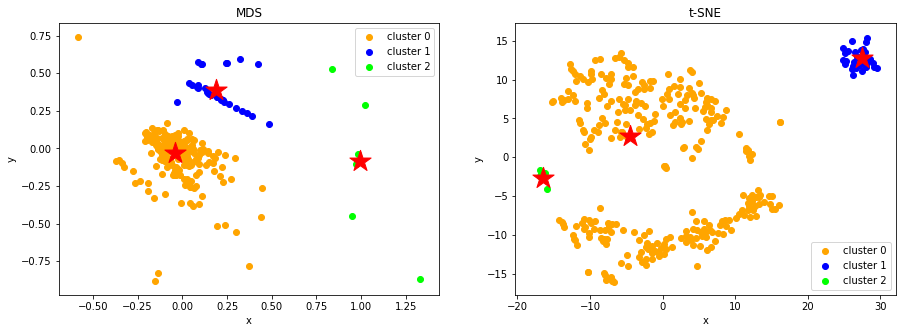

In [35]:
plot_mds_tsne(k, km_k_3_data_and_centers,km_k_3.labels_, n_components=2)

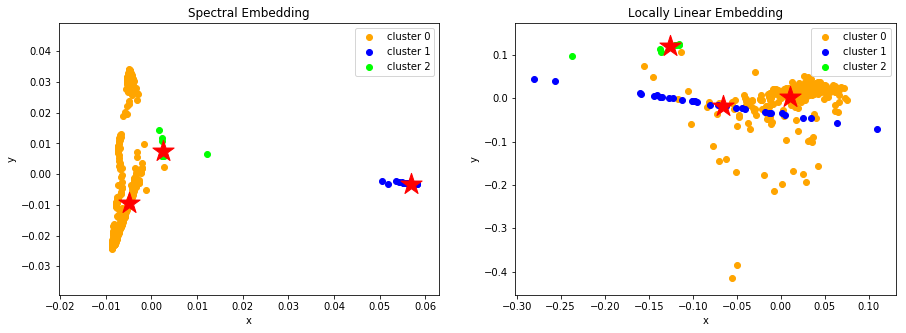

In [36]:
plot_se_lle(k, 10, km_k_3_data_and_centers,km_k_3.labels_, n_components=2)

In [37]:
# Append the cluster labels to the original data
df['cluster_k3'] = pd.Series(km_k_3.labels_, index=df.index)

In [38]:
print(df['cluster_k3'].nunique())
df['cluster_k3'].value_counts()

3


0    295
1     30
2      7
Name: cluster_k3, dtype: int64

In [39]:
df.groupby('cluster_k3').mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,cluster_k4
cluster_k3,,,,,,
0,5112.803390,1501.383458,141.827119,360.813559,1.0,1.183051
1,5146.966667,1297.126666,116.333333,161.600000,1.0,0.000000
2,9153.857143,2098.142857,206.285714,308.571429,0.0,3.000000


<a id='task2_add_algo'></a>

## Task 2 - Additional Clustering Algorithm

In [86]:
# https://learning.oreilly.com/library/view/machine-learning-with/9781491989371/ch19.html#clustering
# https://scikit-learn.org/stable/auto_examples/cluster/plot_mean_shift.html#sphx-glr-auto-examples-cluster-plot-mean-shift-py
from sklearn.cluster import MeanShift

bandwidth = cluster.estimate_bandwidth(scale_data, quantile=0.8)

# Create meanshift object
#ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, cluster_all=False)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, cluster_all=True) # MPP -> Set to true until visualisations debugged

# Train model
model = ms.fit(scale_data)

ms_labels = ms.labels_
ms_cluster_centers = ms.cluster_centers_

ms_labels_unique = np.unique(ms_labels)
ms_n_clusters_ = len(ms_labels_unique)

# append the cluster centers to the dataset
ms_scale_data_and_centers = np.r_[scale_data, ms.cluster_centers_]

print("number of estimated clusters : %d" % ms_n_clusters_)

number of estimated clusters : 7


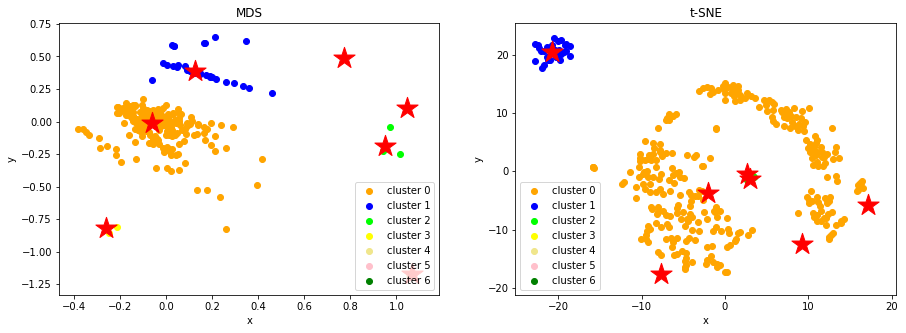

In [87]:
plot_mds_tsne(ms_n_clusters_,ms_scale_data_and_centers, ms.labels_, n_components=2)

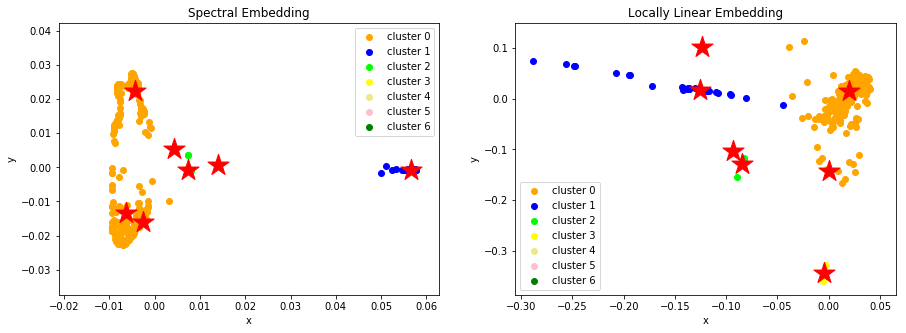

In [88]:
plot_se_lle(ms_n_clusters_, 10, ms_scale_data_and_centers, ms.labels_, n_components=2)

In [89]:
# Append the cluster labels to the original data
df['cluster_ms'] = pd.Series(ms.labels_, index=df.index)

In [90]:
print(df['cluster_ms'].nunique())
df['cluster_ms'].value_counts()

7


0    292
1     30
2      5
3      2
6      1
5      1
4      1
Name: cluster_ms, dtype: int64

In [91]:
df.groupby('cluster_ms').mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,cluster_k4,cluster_k3
cluster_ms,,,,,,,
0,4893.530822,1432.048356,142.000000,360.821918,1.0,1.178082,0.0
1,5146.966667,1297.126666,116.333333,161.600000,1.0,0.000000,1.0
2,4319.000000,2444.200000,150.800000,360.000000,0.0,3.000000,2.0
3,38433.000000,2375.000000,136.000000,360.000000,1.0,2.000000,0.0
4,39999.000000,0.000000,600.000000,180.000000,0.0,3.000000,2.0
5,2500.000000,20000.000000,103.000000,360.000000,1.0,1.000000,0.0
6,2483.000000,2466.000000,90.000000,180.000000,0.0,3.000000,2.0


<a id='task2_add_man'></a>

## Task 2 - Additional Manifold Learning Technique

<a id='task2_vcomp'></a>

## Task 2 - Visual Comparison of Clusterings

<a id='task2_diff'></a>

## Task 2 - Difference Between K-Means And Second Algorithm Discussion

# Cell Graveyard

In [ ]:
def zero_encode(x):
    if(x>0):
        return 1
    else:
        return 0

my_df = pd.DataFrame()
my_df = my_df.append(df, ignore_index = True)

my_df['JointIncome'] = my_df['ApplicantIncome'] + my_df['CoapplicantIncome']    
    

my_df['JointApplicantion'] = my_df['CoapplicantIncome'].apply(zero_encode)


In [ ]:
my_df.head()

In [ ]:
plot_hist_with_box(my_df['JointIncome'])

In [ ]:
my_df = my_df.drop(['ApplicantIncome'], axis=1)

In [ ]:
my_df = my_df.drop(['CoapplicantIncome'], axis=1)

In [ ]:
my_df = my_df.drop(['cluster'], axis=1)

In [ ]:
my_df.head()

In [ ]:
my_data = np.array(my_df.values, dtype=float)
print('(number of examples, number of attributes): ', my_data.shape)

In [ ]:
my_min_max_scaler = preprocessing.MinMaxScaler()
my_data = my_min_max_scaler.fit_transform(my_data)

In [ ]:
k = 4

clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(my_data)

# append the cluster centers to the dataset
my_data_and_centers = np.r_[my_data,clustered_data_sklearn.cluster_centers_]

In [ ]:
# project both th data and the k-Means cluster centers to a 2D space
XYcoordinates = manifold.MDS(n_components=2).fit_transform(my_data_and_centers)
print("transformation complete")

In [ ]:
# plot the transformed examples and the centers
# use the cluster assignment to colour the examples
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

In [ ]:
# project both th data and the k-Means cluster centers to a 2D space
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(my_data_and_centers)
print("transformation complete")

In [ ]:
# plot the transformed examples and the centers
# use the cluster assignment to colour the examples
# plot the transformed examples and the centers
# use the cluster assignment to colour the examples
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

In [ ]:
# Append the cluster labels to the original data
df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)

In [ ]:
df.groupby('cluster').mean()

In [ ]:
scale_df = pd.DataFrame()

In [ ]:
scale_df = scale_df.append(df, ignore_index = True)


In [ ]:
scale_df.head()

In [ ]:
scale_df['ApplicantIncome'] = power_transform(np.expand_dims(scale_df['ApplicantIncome'], axis=1), method='box-cox')

In [ ]:
scale_df['CoapplicantIncome'] = power_transform(np.expand_dims(df['CoapplicantIncome'], axis=1), method='yeo-johnson')

In [ ]:
scale_df['LoanAmount'] = power_transform(np.expand_dims(df['LoanAmount'], axis=1), method='box-cox')

In [ ]:
min_max_scaler2 = preprocessing.MinMaxScaler()
#lab3_data = min_max_scaler.fit_transform(lab3_data)
scale_df['Loan_Amount_Term'] = min_max_scaler2.fit_transform(np.expand_dims(df['Loan_Amount_Term'], axis=1))
#scale_df['ApplicantIncome'] = min_max_scaler2.fit_transform(np.expand_dims(df['ApplicantIncome'], axis=1))
#scale_df['CoapplicantIncome'] = min_max_scaler2.fit_transform(np.expand_dims(df['CoapplicantIncome'], axis=1))
#scale_df['LoanAmount'] = min_max_scaler2.fit_transform(np.expand_dims(df['LoanAmount'], axis=1))

In [ ]:
scale_df.head()

In [ ]:
scale_df.describe(include='all')

In [ ]:
### DEBUG CODE
#scale_df['ApplicantIncome'] = scale_df['ApplicantIncome'] + abs(scale_df['ApplicantIncome'].min())

In [ ]:
#scale_df['CoapplicantIncome'] = scale_df['CoapplicantIncome'] + abs(scale_df['CoapplicantIncome'].min())
#scale_df['LoanAmount'] = scale_df['LoanAmount'] + abs(scale_df['LoanAmount'].min())

In [ ]:
scale_df.describe(include='all')

In [ ]:
# scale_df['ApplicantIncome'] = df['ApplicantIncome']
# plot_hist_with_box(scale_df['ApplicantIncome'])
# scale_df['ApplicantIncome'] = power_transform(np.expand_dims(scale_df['ApplicantIncome'], axis=1), method='box-cox')
# plot_hist_with_box(scale_df['ApplicantIncome'])
# scale_df['ApplicantIncome'] = min_max_scaler2.fit_transform(np.expand_dims(df['ApplicantIncome'], axis=1))
# plot_hist_with_box(scale_df['ApplicantIncome'])